## Load Libraries

In [1]:
# from google.colab import files
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import cm

## Load WBA Data

In [3]:
import os
os.getcwd()

'/'

In [4]:
os.chdir('/Users/lijiaze/Desktop/2022-2/CITS5553/model/')

In [5]:
wba = pd.ExcelFile("WBA.xlsx").parse("Absorbance")
subjects = wba.iloc[:,[0,34]]
wba_y_true = wba['OverallPoF'].values
wba = wba.iloc[:,39:] # just keep frequency columns
print(wba.shape)
wba.head()

(239, 107)


,f(226.0000),f(257.3256),f(280.6155),f(297.3018),f(324.2099),f(343.4884),f(363.9133),f(385.5527),f(408.4789),f(432.7683),...,f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
0,0.0987,0.1274,0.1592,0.1737,0.1700,0.1617,0.1640,0.1799,0.1932,0.1969,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.2047,0.2090,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,0.1096,0.1509,0.1941,0.2156,0.2139,0.2065,0.2172,0.2413,0.2607,0.2706,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,0.0748,0.0953,0.1190,0.1285,0.1233,0.1151,0.1169,0.1294,0.1411,0.1465,...,0.0077,0.0123,0.0066,-0.0024,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,0.1863,0.2230,0.2641,0.2836,0.2794,0.2685,0.2701,0.2846,0.3011,0.3072,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642


In [6]:
scaler = MinMaxScaler()
wba_scaled = scaler.fit_transform(wba)
wba_scaled = pd.DataFrame(wba_scaled, columns = wba.columns)

print(wba_scaled.shape)
wba_scaled.head()

(239, 107)


,f(226.0000),f(257.3256),f(280.6155),f(297.3018),f(324.2099),f(343.4884),f(363.9133),f(385.5527),f(408.4789),f(432.7683),...,f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
0,0.151824,0.180600,0.215999,0.243594,0.257710,0.267177,0.283768,0.339207,0.484516,0.403030,...,0.666443,0.625512,0.582694,0.550949,0.512688,0.463044,0.428869,0.403822,0.366030,0.325555
1,0.169777,0.215550,0.260020,0.294841,0.303336,0.307132,0.320300,0.367527,0.505221,0.429221,...,0.437484,0.425756,0.416949,0.409895,0.395569,0.371903,0.357464,0.348667,0.323509,0.290193
2,0.167232,0.216782,0.273325,0.316136,0.336880,0.350822,0.388823,0.468009,0.606050,0.562554,...,0.574240,0.562124,0.547814,0.525060,0.506442,0.488021,0.486037,0.484724,0.456198,0.415810
3,0.118038,0.131178,0.149967,0.165339,0.173490,0.180172,0.190758,0.233270,0.390709,0.293939,...,0.223181,0.211701,0.204906,0.172840,0.153719,0.151086,0.150038,0.160201,0.145736,0.146176
4,0.275657,0.327791,0.388305,0.433864,0.455005,0.466580,0.493286,0.558842,0.678790,0.641775,...,0.412026,0.394193,0.397770,0.419477,0.394788,0.390152,0.416493,0.526033,0.560694,0.494038


## Transform WBA Data to Long Format

In [7]:
wba_long = pd.concat([wba, subjects], axis=1)
wba_long = pd.melt(wba_long, id_vars=['Subject','OverallPoF'], value_vars=['f(226.0000)','f(226.0000)','f(257.3256)','f(280.6155)','f(297.3018)','f(324.2099)','f(343.4884)','f(363.9133)','f(385.5527)','f(408.4789)','f(432.7683)','f(458.5020)','f(471.9372)','f(500.0000)','f(514.6511)','f(545.2539)','f(561.2310)','f(577.6763)','f(594.6036)','f(629.9605)','f(648.4198)','f(667.4199)','f(686.9768)','f(707.1068)','f(727.8266)','f(749.1535)','f(771.1054)','f(793.7005)','f(816.9577)','f(840.8964)','f(865.5366)','f(890.8987)','f(917.0040)','f(943.8743)','f(971.5319)','f(1000.0000)','f(1029.3022)','f(1059.4631)','f(1090.5077)','f(1122.4620)','f(1155.3527)','f(1189.2071)','f(1224.0535)','f(1259.9210)','f(1296.8396)','f(1334.8399)','f(1373.9536)','f(1414.2136)','f(1455.6532)','f(1498.3071)','f(1542.2108)','f(1587.4011)','f(1633.9155)','f(1681.7928)','f(1731.0731)','f(1781.7974)','f(1834.0081)','f(1887.7486)','f(1943.0639)','f(2000.0000)','f(2058.6045)','f(2118.9262)','f(2181.0155)','f(2244.9241)','f(2310.7054)','f(2378.4142)','f(2448.1071)','f(2519.8421)','f(2593.6791)','f(2669.6797)','f(2747.9073)','f(2828.4271)','f(2911.3064)','f(2996.6142)','f(3084.4217)','f(3174.8021)','f(3267.8309)','f(3363.5857)','f(3462.1462)','f(3563.5949)','f(3668.0162)','f(3775.4973)','f(3886.1278)','f(4000.0000)','f(4117.2089)','f(4237.8524)','f(4362.0309)','f(4489.8482)','f(4621.4108)','f(4756.8285)','f(4896.2142)','f(5039.6842)','f(5187.3582)','f(5339.3594)','f(5495.8146)','f(5656.8542)','f(5822.6127)','f(5993.2283)','f(6168.8433)','f(6349.6042)','f(6535.6618)','f(6727.1713)','f(6924.2925)','f(7127.1897)','f(7336.0323)','f(7550.9945)','f(7772.2555)','f(8000.0000)'],var_name='Frequency', value_name='WBA')
wba_long['Frequency'] = wba_long['Frequency'].str[2:-1].astype(float)

subjects_long = wba_long.iloc[:,0:2]
wba_long = wba_long.iloc[:,2:]
wba_long.head()

,Frequency,WBA
0,226.0,0.0987
1,226.0,0.1114
2,226.0,0.1096
3,226.0,0.0748
4,226.0,0.1863


In [8]:
scaler = MinMaxScaler()
wba_long_scaled = scaler.fit_transform(wba_long)
wba_long_scaled = pd.DataFrame(wba_long_scaled, columns = wba_long.columns)

print(wba_long_scaled.shape)
wba_long_scaled.head()

(25573, 2)


,Frequency,WBA
0,0.0,0.391172
1,0.0,0.399757
2,0.0,0.398540
3,0.0,0.375017
4,0.0,0.450385


## DBSCAN on WBA Data

In [9]:
outlier_detection = DBSCAN(
    eps = 1.31,
    metric = "euclidean",
    min_samples = 5,
    n_jobs = -1
)

clusters = outlier_detection.fit_predict(wba_scaled) # -1 is outlier, num indicates subgroup

wba_y_pred = clusters
for i in range(len(wba_y_pred)):
  if wba_y_pred[i] != -1:
    wba_y_pred[i] = 0
for i in range(len(wba_y_pred)):
  if wba_y_pred[i] == -1:
    wba_y_pred[i] = 1

print(confusion_matrix(wba_y_true, wba_y_pred)) # columns are predictions, rows are truth
print(classification_report(wba_y_true, wba_y_pred))

[[185  16]
 [ 27  11]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       201
           1       0.41      0.29      0.34        38

    accuracy                           0.82       239
   macro avg       0.64      0.60      0.62       239
weighted avg       0.80      0.82      0.81       239



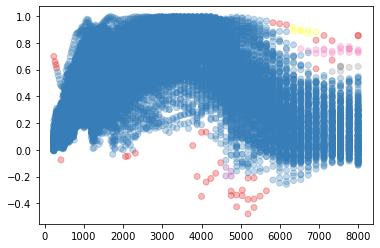

In [10]:
outlier_detection = DBSCAN(
    eps = 0.03,
    metric = "euclidean",
    min_samples = 5,
    n_jobs = -1
)

clusters = outlier_detection.fit_predict(wba_long_scaled) # -1 is outlier, num indicates subgroup

cmap = cm.get_cmap('Set1')
plt.scatter(wba_long["Frequency"], wba_long["WBA"], c=clusters, cmap=cmap, alpha=0.3)
plt.show()

In [163]:
dbscan = pd.concat([wba_long, subjects_long], axis=1)
dbscan['DBSCAN'] = clusters
dbscan.to_csv("dbscan.csv")

## Isolation Forest

In [11]:
rs = np.random.RandomState(0) # psuedo random number generator
clf = IsolationForest(max_samples=100, random_state=rs, contamination=0.1)
clf.fit(wba_long_scaled)
if_scores = clf.decision_function(wba_long_scaled)
if_anomalies = clf.predict(wba_long_scaled)
if_anomalies = pd.Series(if_anomalies).replace([-1,1], [1,0])
if_anomalies = wba_long_scaled[if_anomalies == 1]


Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Lower => More Anomalous')

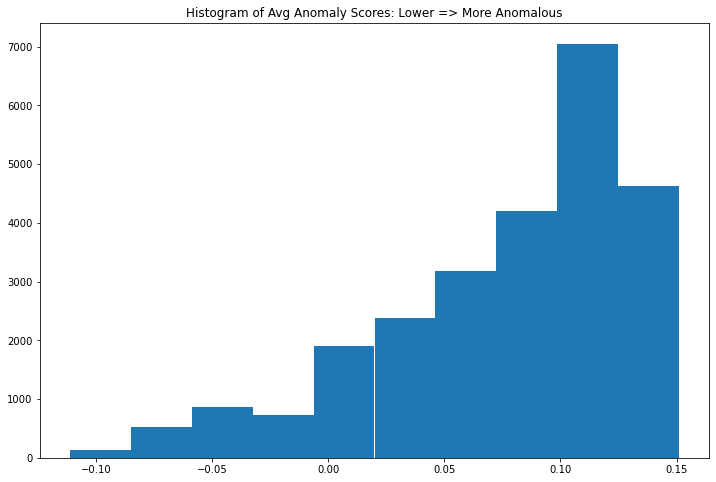

In [12]:
plt.figure(figsize=(12, 8))
plt.hist(if_scores)
plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous')

Text(0.5, 1.0, 'Isolation Forests - Anomalies')

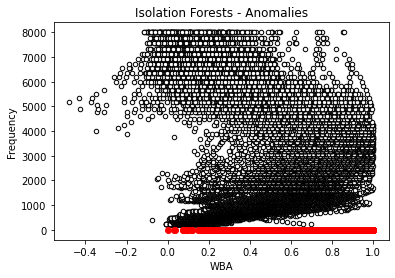

In [24]:
cmap = np.array(['white','red'])
plt.scatter(wba_long['WBA'], wba_long['Frequency'], c='white', s=20, edgecolor='k')
plt.scatter(if_anomalies['WBA'], if_anomalies['Frequency'], c='red')
plt.xlabel('WBA')
plt.ylabel('Frequency')
plt.title('Isolation Forests - Anomalies')

Text(0.5, 1.0, 'Isolation Forests - Anomalies')

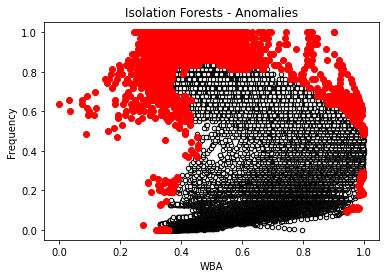

In [15]:
cmap = np.array(['white','red'])
plt.scatter(wba_long_scaled['WBA'], wba_long_scaled['Frequency'], c='white', s=20, edgecolor='k')
plt.scatter(if_anomalies['WBA'], if_anomalies['Frequency'], c='red')
plt.xlabel('WBA')
plt.ylabel('Frequency')
plt.title('Isolation Forests - Anomalies')

IndexError: index 2 is out of bounds for axis 0 with size 2

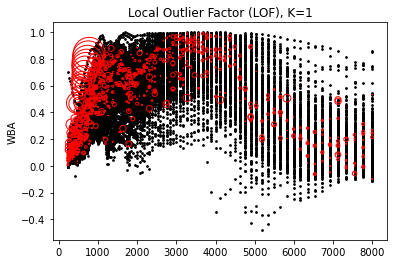

In [35]:
def LOF_plot(k):
 import seaborn as sns
 from sklearn.neighbors import LocalOutlierFactor
 var1,var2=1,2
 clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
 y_pred = clf.fit_predict(wba_long)
 LOF_Scores = clf.negative_outlier_factor_
 
 plt.title('Local Outlier Factor (LOF), K={}'.format(k))
 plt.scatter(wba_long["Frequency"], wba_long['WBA'], color='k', s=3., label='Data points')
 radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
 plt.scatter(wba_long["Frequency"], wba_long['WBA'], s=1000 * radius, edgecolors='r', facecolors='none', label='Outlier scores')
 plt.axis('tight')
 plt.ylabel('{}'.format(wba_long.columns[var1]))
 plt.xlabel('{}'.format(wba_long.columns[var2]))
 legend = plt.legend(loc='upper left')
 legend.legendHandles[0]._sizes = [10]
 legend.legendHandles[1]._sizes = [20]
 plt.show();

LOF_plot(1)
# LOF_plot(30)
# LOF_plot(70)

In [22]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=.1,random_state=0)
clf.fit(wba_long)
ee_scores = pd.Series(clf.decision_function(wba_long)) 
ee_predict = clf.predict(wba_long)

In [ ]:
cmap=np.array(['white','red'])
plt.scatter(wba_long.iloc[:,0],wba_long.iloc[:,1],c='white',s=20,edgecolor='k')
plt.scatter(ee_anomalies.iloc[:,1],ee_anomalies.iloc[:,2],c='red')#,marker='x',s=100)
plt.title('Elliptic Envelope - Anomalies')
plt.xlabel('Frequency')
plt.ylabel('WBA')

In [28]:
wba_long.iloc[:,0]

0         226.0
1         226.0
2         226.0
3         226.0
4         226.0
          ...  
25568    8000.0
25569    8000.0
25570    8000.0
25571    8000.0
25572    8000.0
Name: Frequency, Length: 25573, dtype: float64